![image-3.png](figures/fscampus_small.png)

# Derivatives, 2023

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
Frankfurt School of Finance & Management

fabian.woebbeking@dozent.frankfurt-school.de

### Content

* [Symmetric derivatives](#SymmetricDerivatives)
    * Evaluation of Forwards and Futures
    * Principles of Hedging
    * Swaps
    * Future
* [Asymmetric derivatives](#AsymmetricDerivatives)
    * Introduction to Options
    * Share Price Models
    * Cox-Ross-Rubinstein
    * Black Scholes
    * Greeks
    * Merton and Black
    * Volatility

* [Credit derivatives](#CreditDerivatives)
    * Credit Pricing
    * Credit Default Swaps


### Exam (preparation)

* 120 points multiple choice final exam
* Tutorial sessions (Christian Buschmann)

### Reading

* **Hull: Options, Futures and other Derivatives (8th Edition, 2012)**
* Stoll, Whaley: Futures and Options
* Hilpisch: Python for Finance
* Jarrow, Chatterjea: Derivative Securities, Financial Markets, and Risk Management
* Duffie: Credit Swap Valuation, Financial Analyst Journal Jan/Feb 1999 pp 73 - 86
* Heidorn, Mamadalizoda: Investigating the cross currency basis in EURUSD and EURGBP, Frankfurt School–Working Paper Series No. 227 / 2019

### Course materials

* Jupyter notebook (this thingy). Please refer to the [GitHub repository](https://github.com/cafawo/Derivatives)
* Cases. Please refer to the [GitHub repository](https://github.com/cafawo/Derivatives) or links below
* Workbook + accompanying Excel template (on Canvas)
* Slides (on Canvas)

In [107]:
# Case links:
"""
Yeah I know, this does not run on Colab. :)
The solution requires web scraping or the GitHub Python API.
If you have a better solution, let me know.
"""
import os

for file in os.listdir('cases'):
    if file.endswith("ipynb"):
        print('https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/' + file)


https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/1_warmup.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/1_warmup_solutions.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/2_forward.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/2_forward_solutions.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/3_fixedincome.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/3_fixedincome_solutions.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/4_bund.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/4_bund_solutions.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/5_options.ipynb
https://colab.research.google.com/github/cafawo/Derivatives/blob/main/cases/5_options_solutions.ipynb
https://colab.research.google.

# Introduction

![image-3.png](figures/global_deriv_markets.png)

(Source: [Bank for International Settlements, 2022](https://stats.bis.org/statx/srs/table/d5.1))

For reference, the US GDP was 23.32 trillion USD in 2021.

## Put-Call-Parity
Put-Call-Parity is the arbitrage relationship between (European) put, call, and forward.

$$PV(Call) - PV(Put) = S_0 - PV(K)$$

With cash flows at maturity $T$:

$CF(T, Call) = max(S_T - K, 0) = (S_T - K)^+$

$CF(T, Put)  = max(K - S_T, 0) = (K - S_T)^+$

$CF(T, Fwd) = S_T - K$


For example, if a call option is overpriced w.r.t. its replicating portfolio, i.e. Fwd + Put, sell the call and buy the replication. The resulting shift in supply and demand must adjust prices.

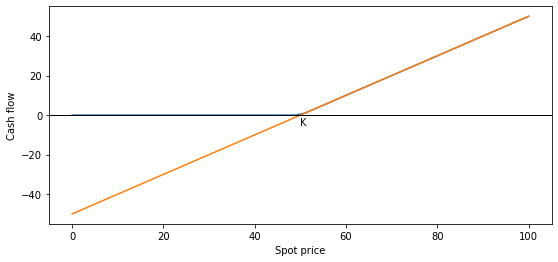

In [108]:
"""Spot price vs cash flow (put-call parity)
"""
import numpy as np
import matplotlib.pyplot as plt

S_T = np.linspace(0,100)
K = 50

# portfolio
CF_T = np.maximum(S_T - K, 0)
CF2_T = S_T - K

# the rest is plotting
plt.figure('PCP', figsize=(9,4))
plt.plot(S_T, CF_T)
plt.plot(S_T, CF2_T)
plt.axhline(y=0, linewidth=1, color="black")
plt.xlabel("Spot price")
plt.ylabel("Cash flow")
plt.annotate("K", (K,-5))
plt.show()


## Financial weapons of mass destruction?

![image-3.png](figures/DerivativesDept.jpg)


## Interest rate languages

Interest rates are quoted per annum (p.a.) but speak different “languages”:

Money Market (MM): 

$C_0(1+r_{mm}T_{mm})=C_T$

ISMA (International Securities Market Association - Europe)

$C_0(1+r_{isma})^T=C_T$

SIA (Securities Industry Association - US)

$C_0(1+r_{sia}/2)^{2T}=C_T$

Continous compounding (academia, financial engineering)

$C_0 e^{rT} = C_T$

T is calculated by dividing the number of days in perid T by a year basis, e.g.

$T = act/360$ (Money Markets - DE/US/...)

$T = act/act$ (Bond - ISMA)

$T = 30/360$ (Swap)

These are some examples for day count conventions, which might differ from country to country. Observe that for $act/act$ and $30/360$, a full year must always yield $T=1$.

In [109]:
"""Interest rate conversion (translation)
"""
import numpy as np

r_isma = 0.1
r_mm = (r_isma*360/365)
r_sia = ((1+r_isma)**0.5-1)*2
r_cont = np.log(1+r_isma)

print(f'r_isma  = {r_isma:.4f}')
print(f'r_mm    = {r_mm:.4f}')
print(f'r_sia   = {r_sia:.4f}')
print(f'r_cont  = {r_cont:.4f}')

r_isma  = 0.1000
r_mm    = 0.0986
r_sia   = 0.0976
r_cont  = 0.0953


Semi-annual compounding has value only for didactical puposes, this is, when increasing the number of compounding periods $m$

$$C_0 \left( 1+\frac{r}{m} \right)^{mT}=C_T$$

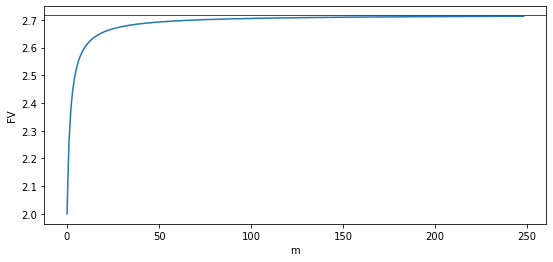

FV(m = 100000) = 2.7183
EXP(1)         = 2.7183


In [110]:
"""Continous compounding
"""
import numpy as np
import matplotlib.pyplot as plt

def FV(m):
    PV = 1
    r  = 1
    T  = 1
    return PV * (1 + r / m)**(T * m)

#FV_m = list(map(lambda m: FV(m), range(1,250)))
FV_m = FV(np.arange(1,250))

# plotting
plt.figure('exp', figsize=(9,4))
plt.plot(FV_m)
plt.axhline(y=np.exp(1), linewidth=1, color="red")
plt.xlabel("m")
plt.ylabel("FV")
plt.show()

print(f'FV(m = 100000) = {FV(100000):.4f}')
print(f'EXP(1)         = {np.exp(1):.4f}')

<a id='SymmetricDerivatives'></a>
# Symmetric derivatives

## Forward

Reading: 

* Hull ch. IV, pp. 75 - 100
* Hull ch. V, pp. 101 - 128

### Tulip Mania in Holland (17th century)

![image-3.png](figures/tulip.png)

### Forward valuation (cost-of-carry)

![image.png](figures/forward_spot.png)

To replicate a forward consider a portfolio that consists of underlying $S$ and cash $K$, which today is worth

$$f_0 = S_0 - K e^{-rT}$$

and at maturity $T$

$$f_T = S_T - K$$

The forward rate $F$ at initiation is set such that $f_0 = 0$, hence,

$$S_0 - F e^{-rt} = 0  \Leftrightarrow F = S e^{rT}$$

For many assets, additional factors affect the forward price, such as:

* dividend yield,
* storage costs,
* convenience yield.

Considering all factors, we have

$$f_0 = S_0 e^{(-q-y+u)T} - K e^{-rT}$$

and

$$F = S e^{(r-q+u-y)T}$$

In [111]:
"""Forward valuation
"""
def forward_price(spot, maturity, rate, income=0, storage=0, convenience=0):
    return spot * np.exp((rate - income + storage - convenience) * maturity)

def forward_mtm(strike, spot, maturity, rate, income=0, storage=0, convenience=0):
    return spot * np.exp((- income + storage - convenience) * maturity) - strike * np.exp(- rate * maturity)
    

# 12
print(f'E12: forward_mtm(55, 60, 1/2, 0.04)       =  {forward_mtm(55, 60, 1/2, 0.04):.2f}')
    
# 14    
print(f'E14: forward_mtm(27, 25, 6/12, 0.1, 0.04) = {forward_mtm(27, 25, 6/12, 0.1, 0.04):.2f}')
print(f'E14: forward_price(25, 6/12, 0.1, 0.04)   = {forward_price(25, 6/12, 0.1, 0.04):.2f}')

E12: forward_mtm(55, 60, 1/2, 0.04)       =  6.09
E14: forward_mtm(27, 25, 6/12, 0.1, 0.04) = -1.18
E14: forward_price(25, 6/12, 0.1, 0.04)   = 25.76


## Principles of hedging

Reading: 

* Hull ch. III, pp. 56 - 60

### Basis risk

The risk of imperfect hedging.

Consider a long position in a risky asset $S$ to be hedged by selling (short) future $F$. We will hedge the asset in $t=1$, close the hedge in $t=2$ and analyze the basis $b$: 

$b_1 := S_1 - F_1$

$b_2 := S_2 - F_2$

Value of the portfolio in $t=2$

$S_2 + F_1 - F_2 = \underbrace{F_1 + b_2}_{b_2 = S_2 - F_2}$

$b_2$ is unknown in $t=1$, hence, risky. Now also consider the underlying of the future $S^*$

$S_2 + F_1 - F_2 = F_1 + \underbrace{(S^*_2 - F_2)}_\text{time basis} + \underbrace{(S_2 - S^*_2)}_\text{underlying basis} \hspace{1cm} | S^*_2 - S^*_2 $


Reasons for basis risk:
* The hedged asset differs from the underlying
* Uncertainty about the maturity of the hedge
* Future maturity differs from hedge maturity

### Optimal hedge ratio

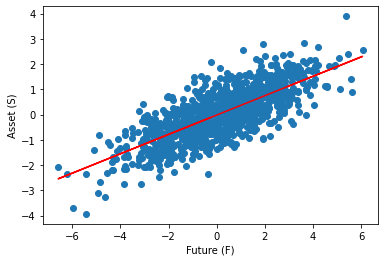

In [112]:
"""Optimal hedge ratio vs linear regression beta
"""
import numpy as np
from numpy.random import randn
from numpy.polynomial.polynomial import polyfit
from scipy.linalg import cholesky
import matplotlib.pyplot as plt

corr = np.array([[1,.75],[.75,1]])
F, S = np.dot(randn(1000,2), cholesky(corr)).T
F = F * 2  # Assume that the future is about twice as volatile as the asset
constant, beta = polyfit(F, S, 1)

plt.figure('mvhegde')
plt.xlabel('Future (F)')
plt.ylabel('Asset (S)')
plt.scatter(F, S)
plt.plot(F, constant + beta * F, 'r-')
plt.show()

Hedge ratio for hedging asset S with future F

$$Var = \sigma^2_S + h^2\sigma^2_F-2 h \rho \sigma_S \sigma_F$$

$$\frac{\delta Var}{\delta h} = 2 h \sigma^2_F - 2 \rho \sigma_S \sigma_F = 0$$

$$...$$

$$h = \rho \frac{\sigma_S}{\sigma_F}$$

In [113]:
rho = np.corrcoef(F,S)[0][1]
sd_F = np.std(F)
sd_S = np.std(S)

print(f"rho(F,S) = {rho:.2f}")
print(f"Linear regression beta: {beta:.4f}")
print(f"Optimal hedge ratio h : {(rho*sd_S/sd_F):.4f}")

rho(F,S) = 0.75
Linear regression beta: 0.3835
Optimal hedge ratio h : 0.3835


## Fixed income underlying

### Bonds

A discount factor is today's price for 1 monetary unit in t, hence, a zero bond with face value 1 and maturity t.

$$C_0 = C_t DF_t \implies DF_t = \frac{C_0}{C_t}$$

The discount factor does not speak a language! However, it can be translated into any interest rate language, e.g.

$$C_0 = C_t \frac{1}{(1 + r)^t} \implies DF_t = \frac{1}{(1+r)^t} \implies r = \left(\frac{1}{DF_t}\right)^{1/t} - 1$$

And as usual

$$PV = \sum^{T}_{t=1}\frac{C_t}{(1+r_t)^t} = \sum^{T}_{t=1}C_t DF_t$$

In [114]:
"""Discounting for plain vanilla coupon bonds
"""
discount_factors = [.90, .80, .70]

def fair_price(coupon):
    # sum(discount_factors) is an annuity factor
    # the last discount factor [-1] discounts the face value
    p = coupon * sum(discount_factors) + discount_factors[-1]  
    return p

print(f'Fair price  7% 3Y bond:  {fair_price(0.07)*100:.4f}')
print(f'Fair price  10% 3Y bond: {fair_price(0.1)*100:.4f}')
print(f'Fair price 14% 3Y bond: {fair_price(0.14)*100:.4f}')

Fair price  7% 3Y bond:  86.8000
Fair price  10% 3Y bond: 94.0000
Fair price 14% 3Y bond: 103.6000


['10.00%', '11.00%', '12.00%']


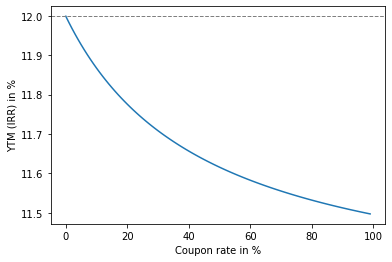

In [115]:
"""Coupon (nominal yield) vs yield to maturity
"""
from scipy.optimize import minimize
import matplotlib.pyplot as plt

discount_factors = [.9091, .8116, .7118]  # normal term structure
#discount_factors = [1/(1.12), 1/(1.10)**2, 1/(1.08)**3]  # inverted term structure


zero_rates = []
for T, DF_T in enumerate(discount_factors):
    T = T + 1
    r_T = (1 / DF_T) ** (1 / T) - 1
    zero_rates.append(r_T)
print([f"{r*100:.2f}%" for r in zero_rates])


# face value = 1!
def IRR_coupon(coupon, discount_factors):
    # calculate PV from market prices
    def fair_price(coupon):
        p = coupon * sum(discount_factors) + discount_factors[-1]
        return p
    # calculate PV from irr
    def IRR_price(irr, coupon):
        T = len(discount_factors)
        annuity_factor = (1 - (1 + irr) ** -T) / irr
        p = coupon * annuity_factor + 1 / (1 + irr) ** T
        return p
    # target function to be minimized
    def NPV2(irr):
        return (fair_price(coupon) - IRR_price(irr, coupon)) ** 2
    # set NPV = 0 and return both PVs and the irr
    opt = minimize(NPV2, x0=0.01, bounds = ((None, None),))
    return [fair_price(coupon), IRR_price(opt.x[0], coupon), opt.x[0]]


#print(IRR(.1, discount_factors))

# lets plot different coupon rates against against their irr
x_coupons = range(100)
y_irrs = list(map(lambda c: IRR_coupon(c/100, discount_factors)[2]*100, x_coupons))

plt.plot(x_coupons, y_irrs)
plt.axhline(y=zero_rates[-1]*100, linestyle='--', linewidth=1, color='grey')
plt.xlabel("Coupon rate in %")
plt.ylabel("YTM (IRR) in %")
plt.show()

### Reference rates (IBOR reform)

![image-5.png](figures/ibor.png)

![image-6.png](figures/ibor_timeline.png)

## Interest rate swaps

Reading: 

* Hull ch. VII, pp. 147 - 180
* Heidorn /Stilger S. 4  - 13


![image-6.png](figures/rates_overview.png)

#### Liability swap

Liability Swap: Receive(Swap) - Pay(effective) = Financing Benefit

![image.png](figures/liability_swap.png)


#### Asset swap

Asset Swap: Receive(Effective) – Pay(Swap) = Investment Benefit

![image-2.png](figures/asset_swap.png)

In [116]:
def YTM(price, coupon, maturity):
    # calculate PV from irr
    def YTM_price(irr, coupon, maturity):
        T = maturity
        annuity_factor = (1 - (1 + irr) ** -T) / irr
        p = coupon * annuity_factor + 1 / (1 + irr) ** T
        return p
    # target function to be minimized
    def NPV2(irr):
        return (price - YTM_price(irr, coupon, maturity)) ** 2
    # set NPV = 0 and return both PVs and the irr
    opt = minimize(NPV2, x0=0.01, bounds = ((None, None),))
    return opt.x[0]

ytm_21 = YTM(100.5/100, 2/100, 5)
print(f'YTM = {ytm_21 * 100:.2f}%')
#print(f'Liability swap level = Euribor {(ytm_21 - 0.02) * 10000:.0f} basis points')

ytm_22 = YTM(101.0/100, 3/100, 5)
print(f'YTM = {ytm_22 * 100:.2f}%')
#print(f'Asset swap level = Euribor {(ytm_22 - 0.0205) * 10000:.0f} basis points')

YTM = 1.89%
YTM = 2.78%


##### Discount factors and forward rates

Forward rate fixed in $s$ payed in $t$ has arbitrage condition

$$(1+r_s)^s(1+r_{st})^{t-s} = (1+r_t)^t$$

$$r_{st} = \left(\frac{(1+r_t)^t}{(1+r_s)^s}\right)^{1/(t-s)}-1$$

Again, a discount factor $DF_t$ is today's value of 1 that is paid in $t$. Conversely, $1 / DF_t$ is a future value. This allows us to calculate "forward discount factors" by discounting $DF_t$ and compounding a shorter period $s$ with $1/DF_s$. Discounting with a forward discount factor or a forward rate must yield the same, hence,

$$\begin{aligned}
\frac{DF_t}{DF_s} &= \frac{1}{(1 + r_{st})^{t-s}}\\
&... \\
r_{st} &= \left(\frac{DF_s}{DF_t}\right)^{1/(t-s)}-1\\
       &= \left(\frac{(1+r_t)^t}{(1+r_s)^s}\right)^{1/(t-s)}-1
\end{aligned}$$



##### Plain vanilla swap pricing

Agreement to exchange a fixed ($C$) against a variable ($L_t$) payment, assuming annual payments 

$$\begin{aligned}
PV(Fix) &= C \sum_{t=1}^T DF_t\\
PV(Var) &= \sum_{t=1}^T L_t DF_t\\
        &= \sum_{t=1}^T \left(\frac{DF_{t-1}}{DF_t} -1  \right) DF_t\\
        &= 1 - DF_T
\end{aligned}$$

Price the fair swap rate $C$ such that,

$$\begin{aligned}
PV(Fix) &= PV(Var)\\
C \sum_{t=1}^T DF_t &= 1 - DF_T\\
C        &= \frac{1 - DF_T}{\sum_{t=1}^T DF_t}
\end{aligned}$$



Mark to market an existing swap with $C^*$ (the old swap rate) by comparing $PV(Fix)$ and $PV(Var)$

$$\begin{aligned}
PV(Receiver) &= PV(Fix) - PV(Var)\\
    &= C^* \sum_{t=1}^T DF_t - (1 - DF_T) \\
    &= (C^* - C) \sum_{t=1}^T DF_t
\end{aligned}$$

Swap rate $C$ is also the par coupon bond rate that fulfills

$$\begin{aligned}
1 &= \sum^{T}_{t=1}C_t DF_t\\
    &= C \sum^{T}_{t=1}DF_t + DF_T \implies C   = \frac{1 - DF_T}{\sum^{T}_{t=1}DF_t}
\end{aligned}$$

#### Single curve approach

Use one curve to
1. calculate (bootstrap) spot rates (discount factors)
2. calculate forward rates (substitute $L_t$ as cash flow)
3. solve for $C$ such that $PV(Fix)$ and $PV(Var)$

#### Bootstrapping

Bootstrapping, i.e. creating zero bonds from a market of coupon bearing instruments

$$DF_t = \frac{1 - C_t \sum_{i=1}^{t-1} DF_i}{1 + C_t}$$

In [117]:
"""Bootstrapping from swap rates (assuming annual payments)
"""
def swap_bootstrap(swap_rates):
    discount_factors = []
    for s in swap_rates:
        # See Slide 61 
        DF_T = (1 - s * sum(discount_factors)) / (1 + s)
        discount_factors.append(DF_T)
        
    zero_rates = []
    for T, DF_T in enumerate(discount_factors):
        # Python starts counting at 0, hence, +1
        T = T + 1
        # See Slide 48
        r_T = (1 / DF_T)**(1 / T) - 1
        zero_rates.append(round(r_T,4))
        
    return [discount_factors, zero_rates]

example = swap_bootstrap([0.04, 0.05, 0.06])
print(example)

[[0.9615384615384615, 0.9065934065934065, 0.8376529131246111], [0.04, 0.0503, 0.0608]]


In [118]:
"""Single curve swap pricing
"""
discount_factors = swap_bootstrap([0.04, 0.05, 0.06])[0]

def swap_pricing(discount_factors):
    # See Slide 66
    s_T = (1 - discount_factors[-1]) / sum(discount_factors)
    return s_T
    
print(f"3Y swap rate = {swap_pricing(discount_factors)*100:.2f}%")

3Y swap rate = 6.00%


In [119]:
"""Single curve forward swap pricing
"""
discount_factors = swap_bootstrap([0.04, 0.05, 0.06])[0]

# Please note that discount_factors is a vector that starts with the first discount factor (t = 1)
s_13 = (discount_factors[0] - discount_factors[-1]) / sum(discount_factors[1::])

print(f"1X2 swap rate = {s_13*100:.2f}%")

1X2 swap rate = 7.10%


### Multi curve approach

Reading: 
* Heidorn /Stilger S. 24  - 38

#### Swap market after the financial crisis

Since the financial crisis, there exists a considerable spread between 6M Euribor and 6M Eonia Swap

![image.png](figures/postcrisis_swapmarket.png)

* Credit risk in the Euribor fixings increased (basis)
* Credit risk is smaller for a shorter tenure (e.g. EONIA)
* Credit Support Annex (CSA) was introduced, all Swaps among financial institutions are collateralized.
* The credit risk in such a swap is very small (over night), but the fixings on the Euribor include credit risk.

Since there exists a basis, it can be traded (basis swap).

#### Single curve
* The dicsount factors and the forwards are calculated individually for each product
* This gives correct results for pricing swaps with a ${NPV}=0$
* But using different discount curves leads to arbitrage and incorrect close out prices 

#### Multi curve (implied forwards)
* The dicsount factors are calculated from the swap curve closest to risk free, e.g. against EONIA
* For each different tenure the forwards are calibrated using the swap quotation and the EONIA discount factors
* Main advantage is the single discounting curve

Implied forward rate
$$\tilde{L_T} = \frac{C_T \sum_{t=1}^T DF_t - \sum_{t=1}^{T-1} L_t DF_t}{DF_T} \equiv \frac{CD - LD}{DF_T}$$

Note that

$$\begin{aligned}
PV(Fix) &=PV(Var)\\
C_T \sum_{t=1}^T DF_t &= \sum_{t=1}^T \tilde{L_t} DF_t = \sum_{t=1}^{T-1} \tilde{L_t} DF_t + \tilde{L_T} DF_T\\
\end{aligned}$$

In [120]:
"""Calculate implied forward rates (multi curve approach)
"""
def multi_curve(swap_rates, eonia_rates):
    # bootstrap discount factors from eonia rates
    discount_factors = swap_bootstrap(eonia_rates)[0]
    # setup 
    SDF = 0 # sum of discount factors
    CD = 0  # discounted fixed leg until T
    LD = 0  # discounted float leg until T-1
    
    implied_forwards = []
    for C_T, DF_T in zip(swap_rates, discount_factors):
        SDF += DF_T  # add up discount factors
        CD = C_T * SDF  # C_T is an annuity
        L = (CD - LD) / DF_T  # calculate implied forward rate (see equation above)
        implied_forwards.append(round(L,4))  # round and save L
        LD += L * DF_T  # sum up discounted L (used in next iteration)
        
    return implied_forwards
    
print(f"Implied forward rates: {multi_curve([0.04, 0.05, 0.06], [0.033, 0.045, 0.053])}")

Implied forward rates: [0.04, 0.0606, 0.082]


In [121]:
"""Price a forward swap (multi curve approach)
"""
implied_forwards = multi_curve([0.04, 0.05, 0.06], [0.033, 0.045, 0.053])
eonia_discount_factors = swap_bootstrap([0.033, 0.045, 0.053])[0]

PV_Var = sum(np.array(implied_forwards[1::]) * np.array(eonia_discount_factors[1::]))

s_13m = PV_Var / sum(eonia_discount_factors[1::])

print(f"1X2 swap rate (multi curve) = {s_13m*100:.2f}%")

1X2 swap rate (multi curve) = 7.09%


### Cross currency swap (CCY)

Reading: 
* Hull ch. VII, pp. 165 - 167
* Thomas Heidorn / Nekruz Mamadalizoda 2019

CCY basis swap:

1. Exchange of interest rates in different currencies 
2. Nominal exchange with todays FS spot rate
3. Agreement on FX forward for the nominal at the **original spot FX rate**

![image.png](figures/ccy_quote.png)

In theory, the spread of the product should be almost zero. However, due to different liquidity levels and different credit levels in the currencies, in reality we find substantial spreads.

![image-5.png](figures/ccy_mechanics.png)

### FX Swap

Let us start with two definitions:

* **FX rate**: The amount of "Base currency" expressed in "Quoted currency", i.e. Base|Quoted, e.g. 

$$\text{EUR|USD} = 1.3591$$
$$\text{USD|JPY} = 82.407$$

![image.png](figures/crossrates.png)


* **Cross rate**: The FX rate that represents the arbitrage relationship with two other FX rates. E.g.



$$\text{EUR|JPY} = \text{EUR|USD} \times \text{USD|JPY} = 1.3591 \times 82.407 = 111.999$$

$$\text{EUR|GBP} = \text{EUR|USD} \times \text{GBP|USD}^{-1} = 1.3591 \times \frac{1}{1.6136} = 0.84228$$

The FX swap is an agreement to exchange spot at $S$ as well as in the future at forward rate $F_T$. According to Covered Interest Rate Parity, this has arbitrage relationship:

$$
\begin{align*}
(1 + r_B \times T_B) F_T &= S (1 + r_Q \times T_Q) \\
&...\\
F_T &= S \frac{(1 + r_Q \times T_Q)}{(1 + r_B \times T_B)}
\end{align*}
$$

By convention, FX forwards (aka FX ourights) are often quotet in FX swap points, this is,

$$\text{FX swap points} = F_T - S$$

![image-2.png](figures/fxswap_realworld.png)

The FX swap market includes besides the interest rate differential also **liquidity** and **credit** advantages of the two currencies. Since the financial crisis the interest differential (interest rate parity) is not a good indicator for the FX swap anymore.

In [122]:
# FX outright
r_EUR = 1.43750 / 100
r_USD = 1.05310 / 100
EURUSD = 1.3193
T_act = 365

FX_Fwd = EURUSD * (1 + r_USD * T_act / 360)/(1 + r_EUR * T_act / 360)

print(f"EURUSD forward =  {FX_Fwd:.4f}")
print(f"EURUSD swap    = {FX_Fwd - EURUSD:.4f}")

EURUSD forward =  1.3142
EURUSD swap    = -0.0051


## Forward rate agreement (FRA)

A Forward Rate Agreement (or FRA) is an agreement between two parties to exchange a short term underlying interest rate in the future.

$$\text{Settlement amount} = \frac{(L(d_2)-r(d_3,d_4)) \frac{act}{360}}{\left(1+L(d_2) \frac{act}{360}\right)} \times \pm \text{Nominal}$$

A buyer enters into the contract to protect himself from increasing interest rates, hence, $+ \rightarrow$ buyer, $- \rightarrow$ seller.

![image-2.png](figures/fra_settlement.png)

## Future clearing, settlement and hedging

We will use a Bund future to highlight the peculiarities of future clearing, settlement and hedging. The Bund future is a future traded at EUREX on a hypothetical long term German government bond. 

![image-2.png](figures/bund_future.png)


### Clearing

A clearing mechanism is a margining mechanism the involves one or more of:
* initial margin
* variation margin
* maintenance margin

![image-3.png](figures/clearing.png)


### Settlement
**Bund future specifications:**
* Notional:		**Hypothetical 6% Bund**
* Deliverable:	**Bund with maturity 8,5 to 10,5 years**
* Nominal:		**100,000 EUR**
* Maturity: 	March, June, September, December (next three, 10th calendar day)
* End: 		    Two exchange days before Settlement
* Price:		Quote in % 

The ideal bond is not available, thus, we need a conversion factor $\text{CF}_{\text{Bond}}$

$$
\begin{align*}
\text{CF}_{\text{Bond}} &= \frac{\text{PV}_{\text{Bond}}(@6\%)}{\text{PV}_{\text{Underlying}}(@6\%)}\\
&= \frac{\text{PV}_{\text{Bond}}(@6\%)}{100}.
\end{align*}
$$

The conversion factor allows us to calculate the payment at deilvery

$$\text{Delivery payment} = \text{EDSP} \times \text{CF}_{\text{Bond}} \times 100,000 + \text{Accrued} $$

“The final settlement price \[EDSP\] is **established by Eurex on the final settlement day at 12:30 CET** based on the **volume-weighted average price of all trades during the final minute** of trading provided that more than ten trades occurred during this minute; otherwise the volume-weighted average price of the last ten trades of the day, provided that these are not older than 30 minutes. If such a price cannot be determined, or does not reasonably reflect the prevailing market conditions, Eurex will establish the final settlement price.” (Eurex Exchange 2019)




In [123]:
import calendar
from datetime import datetime
from dateutil.relativedelta import relativedelta

class Bond():
    def __init__(self, settlement:str, maturity:str, coupon:float=0):
        self.settlement = datetime.fromisoformat(settlement)
        self.maturity = datetime.fromisoformat(maturity)
        self.coupon = coupon
        if self.coupon > 0:
            # List of coupon payment days (ignoring modified following)
            self.coupon_shedule = [self.maturity]
            while True:
                coupon_date = min(self.coupon_shedule) - relativedelta(years=1)
                if coupon_date < self.settlement: break
                self.coupon_shedule.append(coupon_date)
            self.coupon_shedule.sort()
            # The next element in the coupon shedule (accrued interest)
            self.next_coupon = min(self.coupon_shedule)
            self.previous_coupon = min(self.coupon_shedule) - relativedelta(years=1)
            self.last_coupon = max(self.coupon_shedule)
            # Accrued interest
            self.accrued_period = self.actact(self.previous_coupon, self.settlement)
            self.accrued = self.coupon * self.accrued_period
            
    def actact(self, start_date:datetime, end_date:datetime):
        if start_date == end_date:
            return 0.0
        start_date = datetime.combine(start_date, datetime.min.time())
        end_date = datetime.combine(end_date, datetime.min.time())
        start_year = start_date.year
        end_year = end_date.year
        year_1_diff = 366 if calendar.isleap(start_year) else 365
        year_2_diff = 366 if calendar.isleap(end_year) else 365
        total_sum = end_year - start_year - 1
        diff_first = datetime(start_year + 1, 1, 1) - start_date
        total_sum += diff_first.days / year_1_diff
        diff_second = end_date - datetime(end_year, 1, 1)
        total_sum += diff_second.days / year_2_diff
        return total_sum

    def cleanprice(self, ytm:float=None):
        price = 0
        if self.coupon > 0:
            for t in bond.coupon_shedule:
                t_period = self.actact(self.settlement, t)
                price += self.coupon * 1 / (1 + ytm) ** t_period
            # Dirty price
            price += 100 / (1 + ytm) ** t_period
            # Clean price
            return price - self.accrued
        else:
            price += 100 / (1 + ytm) ** self.actact(self.settlement, self.maturity)
            return price
    
    def dirtyprice(self, ytm:float=None):
        if self.coupon > 0:
            return self.cleanprice(ytm) + self.accrued
        else:
            return self.cleanprice(ytm)
        

bond = Bond("2004-03-10", "2013-01-04", 4.5)
print(f"Accrued interest: EUR  {bond.accrued:.4f}")
print(f"Clean price @6%:  EUR {bond.cleanprice(0.06):.4f}")

Accrued interest: EUR  0.8115
Clean price @6%:  EUR 89.9344


### Cheapest-to-deliver

Now that we have the conversion factor ($\text{CF}_{\text{Bond}}$), we have to choose which bond to deliver at maturity. This is the cheapest-to-deliver, which can be identified by its implied repo rate

$$
\text{Implied repo} = \frac{\text{Delivery payment} - \text{Dirty price}}{\text{Dirty price} \times \frac{\text{Days to settlement}}{360}}
$$

A Repo trade is the agreement to sell (Spot) and buy back ($t+n$) an asset. Spot short and at the same time future long can be seen as a repo trade. Another interpretation is collateralized lending. The bond with the highest Implied Repo rate is the cheapest to deliver (CTD).


### Theoretical future price

The forward price for the bond cheapest to deliver (CTD) is determined by the costs of acquiring the bond now and holding it until it shall be delivered to fulfil the obligation from the future. The cost of carry model applies, hence,

$$\text{Forward price} = \text{Spot} + \text{Financing} - \text{Accrued}$$

Considering the underlying of the future,

$$\text{Theoretical future} = \frac{\text{Forward price}}{\text{CF}_{\text{Bond}}}$$


### Hedging with bund futures

$$\text{Simple hedge ratio} = \frac{\text{Nominal spot position}}{\text{Nominal future}}$$

Basis Point Value (BPV = PVO1) Hedge is a Nominal hedge, adjusted for underlying Basis Risk.

$$\text{Basis point hedge ratio} = \text{Simple hedge ratio} \times \text{CF}_{\text{Bond}} \times \frac{\text{BPV}_\text{Spot}}{\text{BPV}_\text{CTD}}$$

PVO1 or BPV is the MTM change caused by a $0.0001$ = 1bp shift in yield.

<a id='AsymmetricDerivatives'></a>
# Asymmetric derivatives

## Assumptions
* No transaction costs
* Same tax for all profits
* Borrowing and lending at the same risk-free rate $r_f$


## Option price boundaries

Notation:
* Stock price $S$
* Strike price $K$ (or $X$ in some text books)
* American call $C$ and put $P$
* European call $c$ and put $p$
* Time to maturity $T$


|               | Lower boundaries   &nbsp;  &nbsp;  &nbsp;  | Upper boundaries       |
|---------------|-------------------------------|--------------------|
| European Call | $c \ge S-K e^{-rT}$    | $c \le S$                |
| American Call |$C \ge S-Ke^{-rT}$      | $C \le S$                |
| European Put  | $p \ge K e^{-rT} - S$  | $p \le K e^{-rT}$         |
| American Put  | $P \ge K - S$          | $P \le K$                 |



Why it makes no sense to execute an american call option prematurely:
* A at 0: $C + Ke^{-rT}$ becomes at T: $\max(S_T - K, 0) + K = \max(S_T,K)$
* B at 0: $S_0$ becomes at T: $S_T$
* A $\ge$ B, unless ...
* exercise A at $\tau < T$ becomes: $S_\tau-K+Ke^{-r(T-\tau)}<S_\tau$
* Hence, never execute early, i.e. $C = c \ge S-Ke^{-rT}$
* Sell the option instead!


## Probability distributions

Consider random variable $X \sim \mathcal{N}(\mu,\sigma^2)$ as an example for an absolutely continuous univariate distribution.

Probability density function (PDF):
$$\phi(x) = \frac{d\Phi(x)}{dx} = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }$$


Cumulative distribution function (CDF):
$$\Phi(x) = P(X \le x) = \int_{-\infty}^x \phi(u)\; du$$

Quantile function, i.e. inverse of the CDF:
$$\Phi^{-1}(p) = \inf \{x \in \mathbb{R}: p \le \Phi(x)\},\;\; p \in (0,1)$$

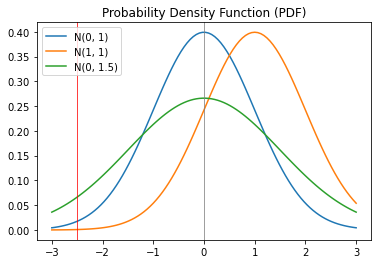

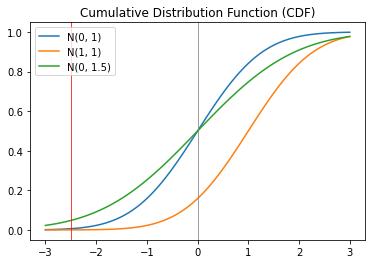

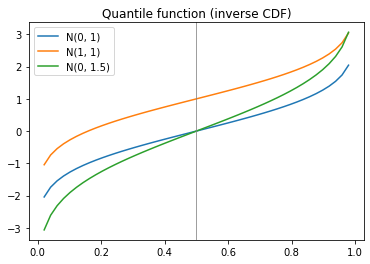

In [124]:
"""PDF vs CDF
"""
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(-3, 3, 100)
p = np.linspace(0, 1)

plt.figure("pdf")
plt.title("Probability Density Function (PDF)")
plt.plot(x, norm.pdf(x, 0, 1))
plt.plot(x, norm.pdf(x, 1, 1))
plt.plot(x, norm.pdf(x, 0, 1.5))
plt.axvline(x=-2.5, color='red', linewidth=.75)
plt.axvline(x=0, color='grey', linewidth=.75)
plt.legend(["N(0, 1)", "N(1, 1)", "N(0, 1.5)"], loc='upper left')

plt.figure("cdf")
plt.title("Cumulative Distribution Function (CDF)")
plt.plot(x, norm.cdf(x, 0, 1))
plt.plot(x, norm.cdf(x, 1, 1))
plt.plot(x, norm.cdf(x, 0, 1.5))
plt.axvline(x=-2.5, color='red', linewidth=.75)
plt.axvline(x=0, color='grey', linewidth=.75)
plt.legend(["N(0, 1)", "N(1, 1)", "N(0, 1.5)"], loc='upper left')

plt.figure("qf")
plt.title("Quantile function (inverse CDF)")
plt.plot(p, norm.ppf(p, 0, 1))
plt.plot(p, norm.ppf(p, 1, 1))
plt.plot(p, norm.ppf(p, 0, 1.5))
plt.axvline(x=0.5, color='grey', linewidth=.75)
plt.legend(["N(0, 1)", "N(1, 1)", "N(0, 1.5)"], loc='upper left')


plt.show()

## Stochastic processes

### Markov property

In probability theory and statistics, the term Markov property refers to the memoryless property of a stochastic process, i.e. only the present price is relevant for predicting the future. Markov property is consistent with the **weak form of market efficiency!**

### Generalized Wiener process
A stochastic process $X$, with drift $\mu$ and dispersion $\sigma$, follows a generalized Wiener process if it satisfies the following stochastic differential equation (SDE)

$$dX_t = \mu \times dt + \sigma \times dW_t$$

Note that by definition, the increments of a wiener process $W_t = W_t - W_0 \sim \mathcal{N}(0,t)$, i.e. are normally distributed, centered at zero.

For an arbitrary initial value $X_0$ 

$$X_t = X_0 + \mu \times t + \sigma \times z \times \sqrt{t}$$

, where $z \sim \mathcal{N}(0,1)$.

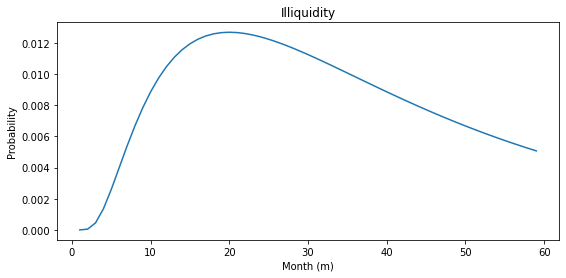

In [125]:
"""Calculate the probability of illiquidity
"""
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def prob_illiquid(m, const=2, drift=.1, variance=.16):
    expected_cash = const + drift * m
    sigma = (variance * m)**0.5
    p_illiquid = norm.cdf( (0 - expected_cash) / sigma ,0,1)  # normalization: (x - mu) / sigma
    return p_illiquid

X = range(1,12*5, 1)
fX = list(map(lambda m: prob_illiquid(m), X))

plt.figure('Illiquidity', figsize=(9,4))
plt.title("Illiquidity")
plt.plot(X, fX)
plt.xlabel("Month (m)")
plt.ylabel("Probability")
plt.show()

### Geometric Brownian motion

A stochastic process $S$ follows a Geometric Brownian Motion (GBM) if it satisfies the following stochastic differential equation (SDE)

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

where $W_t = W_t - W_0 \sim \mathcal{N}(0,t)$, i.e. a Wiener process, hence, normally distributed increments.

For an arbitrary initial value $S_0$, the above SDE has the following analytical solution (under Ito's interpretation)

$$S_t = S_0 \exp\left( \left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t \right)$$

, hence,

$$\ln \frac{S_t}{S_0} = \left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t$$

Note that $W_t = z \sqrt{t}$, where $z \sim \mathcal{N}(0,1)$. Therefore, $\ln \frac{S_t}{S_0}$ (log-return) is normally and $S_t$ is log-normally distributed.

In [126]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


#%% Create stock process:
# Random numbers N(0,1)
np.random.seed(888)
Z = np.random.normal(0, 1, 250)
def plot_gbm(mu, sigma):
    # returns for our geometric brownian motion
    R = Z * sigma * np.sqrt(1/250) + (mu-0.5*sigma**2) * 1/250
    # stock process (insert 100 for t=0)
    S = np.insert(100*np.exp(np.cumsum(R)), 0, 100)
    # Plotting
    plt.figure('GBM process', figsize=(9,4))
    plt.title(f"GBM ($\mu$ = {mu}, $\sigma$ = {sigma})")
    plt.axhline(y = 100, color ="black", linestyle ="--", linewidth=1)
    plt.plot(S)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.ylim(30, 170)
    plt.show()

interact(plot_gbm, 
         mu = widgets.FloatSlider(value=0.1, min=-0.5, max=0.5, step=0.05),
         sigma = widgets.FloatSlider(value=0.25, min=0, max=0.9, step=0.05),
        )

interactive(children=(FloatSlider(value=0.1, description='mu', max=0.5, min=-0.5, step=0.05), FloatSlider(valu…

<function __main__.plot_gbm(mu, sigma)>

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

S_0 = 50
mu = 0.16
sigma = 0.3

# Expected price and price volatility
S_1 = 50 * (1 + mu / 365)
print(f"E[S] tomorrow = {S_1:.4f}")
price_vola = 50 * sigma * (1 / 365)**0.5
print(f"Price vola    =  {price_vola:.4f}")

# Confidence interval
q975 = norm.ppf(0.975, 0, 1)
print(f"With 95% confidence: {S_1 - price_vola * q975 :.2f} < S_1 < {S_1 + price_vola * q975 :.2f}")

# Value at risk
q95 = norm.ppf(0.95, 0, 1)
print(f"1 day 95% VaR =  {S_0 * (sigma * (1 / 365)**0.5 * q95 - mu / 365) :.2f}")

E[S] tomorrow = 50.0219
Price vola    =  0.7851
With 95% confidence: 48.48 < S_1 < 51.56
1 day 95% VaR =  1.27


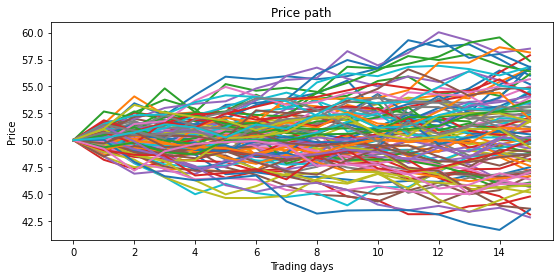

In [128]:
def gbm(mu, sigma, N=15):
    """Cumulative returns from a GBM
    """
    # Random numbers N(0,1)
    Z = np.random.normal(0, 1, N)
    # returns for our geometric brownian motion
    R = Z * sigma * np.sqrt(1/250) + (mu - 0.5*sigma**2) * 1/250
    # stock process (insert 100 for t=0)
    S = np.insert(np.exp(np.cumsum(R)), 0, 1)
    return S

plt.figure('MC', figsize=(9,4))
plt.title("Price path")
for n in range(100):
    plt.plot(S_0*gbm(mu, sigma), linewidth=2)
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.show()

## Option pricing via Monte Carlo simulation

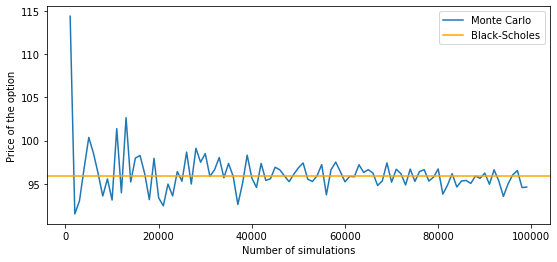

95.91455141466928

In [129]:
"""Monte Caro simulation vs Black Scholes
"""
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Option Parameters
S_0   = 220  # price of the underlying
K     = 220  # strike price
sigma = .98  # volatility
rate  = np.log(1.21)  # converting the ISDA rate to continous
T     = 1    # time to maturity
steps = 2    # steps

# We talk about this later, here its just a reference point
def black_scholes(cpflag,S,K,T,r,sigma):
    # cpflag in {1 for call, -1 for put}
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    price = cpflag * (S * norm.cdf(cpflag*d1, 0.0, 1.0) - K * np.exp(-r * T) * 
            norm.cdf(cpflag*d2, 0.0, 1.0))
    return price

# Monte carlo pricing
def monte_carlo(cpflag,S,K,T,r,sigma,Nsim):
    Z = np.random.normal(0, 1, Nsim)
    S_T = S * np.exp(Z * sigma * np.sqrt(T) + (r-0.5*sigma**2) * T)
    CF_T = np.maximum(cpflag*(S_T - K),0)
    price = np.mean(CF_T) * np.exp(-r*T)
    return price

# Increase Nsim from 1000 to 100000 by 1000
X = range(1000,100000, 1000)
# Compute prices for all Nsim in X
mc_prices = list(map(lambda n: monte_carlo(1,220,220,1,np.log(1.21),0.98,n), X))

plt.figure('Monte Caro simulation vs Black Scholes', figsize=(9,4))
plt.plot(X,mc_prices)
plt.axhline(y=black_scholes(1,220,220,1,np.log(1.21),0.98), color='orange')
plt.xlabel("Number of simulations")
plt.ylabel("Price of the option")
plt.legend(["Monte Carlo", "Black-Scholes"])
plt.show()

black_scholes(1,220,220,1,np.log(1.21),0.98)

## Binomial option pricing models

Consider a replicating portfolio with bond (cash) $B$ and $\Delta$ share in the underlying asset $S$

$$
\begin{align}
V_0 &= B + \Delta S_0\\
V_u &= B e^{rt} + \Delta S_u = (S_u - K)^+\\
V_d &= B e^{rt} + \Delta S_d = (S_d - K)^+
\end{align}
$$

Note that

$$\Delta = \frac{(S_u - K)^+ - (S_d - K)^+}{S_u - S_d}$$

#### Example:
* Replication in a world with only two possible future states, i.e. price goes up $𝑆_𝑢=60$ and price goes down $𝑆_𝑑=40$.
* Consider a 1Y call option with a Strike of 45 on an asset that currently trades at 50 and a continuous risk free rate of 5%

$$
\begin{align}
V_u &= -28.54 e^{0.5} + 0.75 \times 60 = 15\\
V_d &= -28.54 e^{0.5} + 0.75 \times 40 = 0\\
&...\\
V_0 &= -28.54 + 0.75 \times 50 = 8.96\\
\end{align}
$$

In [130]:
"""Replicate the option payout in a one step lattice
"""
import numpy as np

# Weight of the underlying asset
def delta(flag, S_u, S_d, K):  # flag = 1 (Call); -1 (Put)
    delta = ( np.maximum(flag*(S_u - K), 0) - np.maximum(flag*(S_d - K), 0) ) / (S_u - S_d)
    return delta
#print(delta(1, 60, 40, 45))

# Amount of bond in t = 0
def bond(flag, S_u, S_d, K, r, T):
    beta = (np.maximum(flag*(S_u - K), 0) - delta(flag, S_u, S_d, K) * S_u) * np.exp(-r*T)
    return beta
#print(beta(1, 60, 40, 45, 0.05, 1))

print(f"V_u = { bond(1, 60, 40, 45, 0.05, 1) * np.exp(.05) + delta(1, 60, 40, 45) * 60 :.0f}")
print(f"V_d = { bond(1, 60, 40, 45, 0.05, 1) * np.exp(.05) + delta(1, 60, 40, 45) * 40 :.0f}")
print(f"V_0 = { bond(1, 60, 40, 45, 0.05, 1) + delta(1, 60, 40, 45) * 50 :.4f}")

V_u = 15
V_d = -0
V_0 = 8.9631


### Coxx-Ross-Rubinstein (CRR)

The underlying of an option with maturity $T$ is modelled by an $n$ step binomial tree, with time between two steps of the tree $\Delta t = T / n$. With up move $u$ and down move $d$

$$u = \exp\left(\sigma \sqrt{\Delta t}\right)$$

$$d = u^{-1}$$

The following must hold for the up move probability $p$, in order to ensure martingale property,

$$S_0 = \left( S_0 \times u \times p + S_0 \times d \times (1-p) \right) e^{-r\Delta t} \implies p = \frac{e^{r\Delta t} - d}{u - d}$$

Remember the binomial probability mass function (PMF)

$$f(k,n,p) = {n \choose k} p^k (1-p)^{n-k}$$

here, $n$ is the number of steps in the tree and $k$ the number of up moves to reach a state $S_T$.

### European vs American options

The CRR model is solved recuresively by discounting expected values. For American options, the buyer has the right to exercise at any point in time. Due to its discrete modelling of time, the CRR model allows execution at any node in the lattice. However, the buyer would only execute if the value that can be realized through execution $IV_t$ (intrinsic value) is above the discounted expected value of the next node. Therefore, the value that is considered for each node is

$$V_t = \max\left(E[V_{t+\Delta t}]e^{-r\Delta t}, IV_t \right).$$

### CRR solution

Solve recursively by stepwise discounting $V_t$ backwards in the tree. In this example we consider a European call with $S_0 = 220$, $K=165$, $\sigma = 98\%$, $T=1$, $r = 21\%$ ISDA.

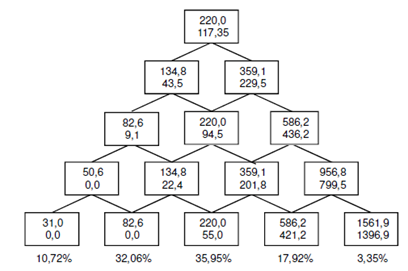

[[220.0], [110.02008068234205, 439.9196919310029], [55.02008251522298, 220.0, 879.6787970394022]]


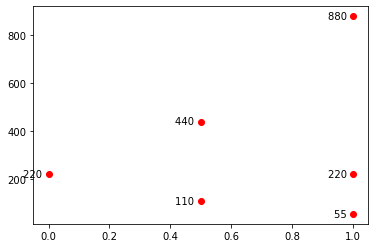

In [131]:
"""Replicating options, Cox Ross Rubinstein style
"""
import numpy as np
import matplotlib.pyplot as plt

# INPUTS
S_0   = 220  # price of the underlying
K     = 220  # strike price
sigma = .98  # volatility
rate  = np.log(1.21)  # converting the ISDA rate
T     = 1    # time to maturity
steps = 2    # steps

# see Slide 10
dt = T / steps
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

binomial_tree = []
for n in range(steps+1):
    binomial_tree.append([])
    for k in range(n+1):
        S_nk = S_0 * u**(k) * d**(n-k)
        binomial_tree[-1].append(S_nk)
        plt.plot(n*dt, S_nk, 'ro')  # this will take forever for large # steps
        plt.annotate(f"{S_nk:.0f}  ", (n*dt, S_nk), ha='right', va='center')
print(binomial_tree)
plt.show()

In [132]:
"""Full CRR model
"""
import matplotlib.pyplot as plt
import numpy as np

def Binomial(n, S, K, r, v, t, PutCall=1, American=False):  
    At = t/n 
    u = np.exp(v*np.sqrt(At))
    d = 1./u
    p = (np.exp(r*At)-d) / (u-d) 
    # Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    # option value at final node    
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        optionvalue[n,j] = max(0, PutCall*(stockvalue[n,j]-K))
    # recursive calculations   
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            if American:
                optionvalue[i,j] = max(0, PutCall*(stockvalue[i,j]-K), np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
            else:
                optionvalue[i,j] = np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])
    return optionvalue[0,0]

# Inputs
S_0   = 220  # price of the underlying
K     = 220  # strike price (165 vs 220)
sigma = .98  # volatility
rate  = np.log(1 + 0.21)  # converting the ISDA rate
T     = 1    # time to maturity
steps = 2    # steps

#Graphs and results for the Option prices
print("European Call Price: %s" %(Binomial(steps, S_0, K, rate, sigma, T, PutCall=1)))
print("American Call Price: %s" %(Binomial(steps, S_0, K, rate, sigma, T, PutCall=1, American=True)))
print("European Put  Price: %s" %(Binomial(steps, S_0, K, rate, sigma, T, PutCall=-1)))
print("American Put  Price: %s" %(Binomial(steps, S_0, K, rate, sigma, T, PutCall=-1, American=True)))

European Call Price: 87.25679654189224
American Call Price: 87.25679654189224
European Put  Price: 49.07497836007403
American Put  Price: 59.982962882003555


## Bianary options

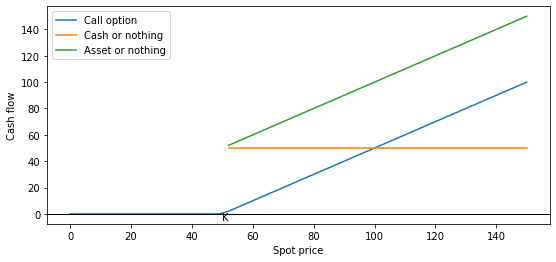

In [133]:
"""Spot price vs cash flow (put-call parity)
"""
import numpy as np
import matplotlib.pyplot as plt

# see workbook task 4 ff.
S_T = np.linspace(0,150)
K = 50

# portfolio
CF_CoN = K * (S_T > K)
CF_AoN = S_T * (S_T > K)
CF_T = CF_AoN - CF_CoN

# hacky removal of 0 (looks better in plot)
CF_CoN = np.array(CF_CoN, dtype=np.double)
CF_CoN[CF_CoN==0] = np.nan
CF_AoN = np.array(CF_AoN, dtype=np.double)
CF_AoN[CF_AoN==0] = np.nan

# the rest is plotting
plt.figure('PCP', figsize=(9,4))
plt.plot(S_T, CF_T, label="Call option")
plt.plot(S_T, CF_CoN, label="Cash or nothing")
plt.plot(S_T, CF_AoN, label="Asset or nothing")
plt.axhline(y=0, linewidth=1, color="black")
plt.xlabel("Spot price")
plt.ylabel("Cash flow")
plt.annotate("K", (K,-5))
plt.legend(loc="upper left")
plt.show()

In [134]:
from scipy.stats import binom

# Recall our CRR parameters
sigma = .98  # volatility
rate  = np.log(1 + 0.21)  # converting the ISDA rate
T     = 1    # time to maturity
steps = 2    # steps
dt = T / steps 
u = np.exp(sigma*np.sqrt(dt))
d = 1 / u
p = (np.exp(rate*dt)-d) / (u-d)

CoN_payout = []
AoN_payout = []
for n, S in enumerate(binomial_tree[-1]):  # This is the binomial tree that we generated above
    if S > 165:  # strike
        AoN_payout.append( binom.pmf(n, steps, p) * S * np.exp(-rate*T) )
        CoN_payout.append( binom.pmf(n, steps, p) * 165 * np.exp(-rate*T) )
AoN = sum(AoN_payout)
CoN = sum(CoN_payout)

print(f"Price asset or nothing = {AoN:.4f}")
print(f"Price cash or nothing  =  {CoN:.4f}")
print(f"AoN - CoN              = {AoN - CoN:.4f}")
print(f"CRR call price (above) = {Binomial(steps, S_0, 165, rate, sigma, T, PutCall=1):.4f}")

Price asset or nothing = 203.6337
Price cash or nothing  =  87.2827
AoN - CoN              = 116.3510
CRR call price (above) = 116.3510


## The Black-Scholes-Merton (BSM) model class

### Intuition

Consider the minimum return required to exercise the option

$$r_{min} = \ln\left(\frac{K}{S_0}\right)$$

as well as the expected geometric return under the risk neutral measure (see the GBM introduced before)

$$E^\mathbb{Q}[r] = r \times T - \sigma^2 \frac{T}{2}$$

Given the assumption of normally distributed log-returns, we have the standardization

$$
\begin{align*}
d_{-} = d_{2} &= - \frac{\ln\left(\frac{K}{S_0}\right) - \left( r T - \sigma^2 \frac{T}{2} \right)}{\sigma \sqrt{T}}\\
 &= \frac{\ln\left(\frac{S_0}{K}\right) + rT - \sigma^2 \frac{T}{2}}{\sigma \sqrt{T}}
\end{align*}
$$

Which gives us the risk-neutral probability of exercising the option $N(d_-)$.



### Black Scholes (no dividend)

$$PV(Call) = S_0 N(d_+)− K e^{-rT} N(d_-)$$

$$PV(Put) = K e^{-rT} N(-d_-) − S_0 N(-d_+)$$

with

$$d_\pm = \frac{\ln\left(\frac{S_0}{K}\right) + rT \pm \sigma^2 \frac{T}{2}}{\sigma \sqrt{T}}$$


### Merton (incl. dividend)

$$PV(Call) = S_0 e^{-qT} N(d_+)− K e^{-rT} N(d_-)$$

$$PV(Put) = K e^{-rT} N(-d_-) − S_0 e^{-qT} N(-d_+)$$

with

$$d_\pm = \frac{\ln\left(\frac{S_0}{K}\right) + (r-q)T \pm \sigma^2 \frac{T}{2}}{\sigma \sqrt{T}}$$


### Black76 (forward)

$$PV(Call) = \left[F_T N(d_+)− K N(d_-)\right] e^{-rT}$$

$$PV(Put) = \left[K N(-d_-) − F_T N(-d_+) \right] e^{-rT}$$

with

$$d_\pm = \frac{\ln\left(\frac{F_T}{K}\right) \pm \sigma^2 \frac{T}{2}}{\sigma \sqrt{T}}$$

Black76 is useful whenerver there exists a liquid forward/futures market, e.g.:
* interest rate options (cap, floor, swaption),
* commodity options,
* FX options.

#### Interest rate options

Let's quickly review the peculiarities of interest rate options, i.e.:

* Cap   (corresponds to the call option)
* Floor  (corresponds to the puto ption)
* Swaption (payer swaption / receiver swaption)

The interest cap (floor) offers an optional hedge against an increase (decrease) in the money market rate (EURIBOR, LIBOR, etc.), i.e. the hedging of an upper (lower) limit.

Caps (floors) consist of a strip of so-called "caplets" ("floorlets"), which are individual options on a strip of forward rates.

As an example, let us consider a interest cap (floor) with a term of 5 years against 6-month EURIBOR

![image.png](figures/cap_floor.png)


Swaptions on the other hand simply represent the right to enter into a payer (receiver) swap, i.e. payer(/receiver)-swaption. The underling is therefore a forward swap.


In [135]:
import numpy as np
from scipy.stats import norm

#%% Black-Scholes formula
def black_scholes(cpflag,S,K,T,r,sigma):
    # cpflag in {1 for call, -1 for put}
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    price = cpflag * (S * norm.cdf(cpflag*d1, 0.0, 1.0) - K * np.exp(-r * T) * 
            norm.cdf(cpflag*d2, 0.0, 1.0))
    return price

print("European Call Price: %s" %(black_scholes(1,220,220,1,np.log(1.21),.98)))
print("European put  Price: %s" %(black_scholes(-1,220,220,1,np.log(1.21),.98)))

European Call Price: 95.91455141466928
European put  Price: 57.73273323285109


In [136]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def plot_block_scholes(pcflag, sigma, r, T):
    # Initial parameters
    X = np.linspace(1,100,100)
    plt.figure('BSM Price', figsize=(9,4))
    plt.plot(X,np.maximum(pcflag*(X-50),0), '--')
    plt.plot(X,black_scholes(pcflag,X,50,1,0.05,0.25))
    plt.plot(X,black_scholes(pcflag,X,50,T,r,sigma))
    plt.legend(["Intrinsic value", "Initial parameters", "Modified parameters"])
    plt.show()

interact(plot_block_scholes, 
         pcflag=widgets.FloatSlider(value=1, min=-1, max=1, step=2),
         sigma=widgets.FloatSlider(value=0.25, min=0.1, max=0.5, step=0.05),
         r=widgets.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01),
         T=widgets.FloatSlider(value=1, min=0.5, max=5, step=0.5)
        )

interactive(children=(FloatSlider(value=1.0, description='pcflag', max=1.0, min=-1.0, step=2.0), FloatSlider(v…

<function __main__.plot_block_scholes(pcflag, sigma, r, T)>

European Call Price: 95.91455141466928
European put  Price: 57.73273323285109


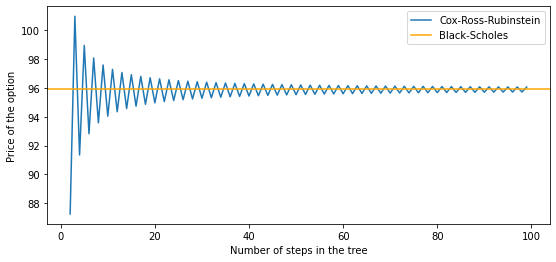

In [137]:
"""CRR vs Black Scholes
"""
print("European Call Price: %s" %(black_scholes(1,220,220,1,np.log(1.21),.98)))
print("European put  Price: %s" %(black_scholes(-1,220,220,1,np.log(1.21),.98)))

X = range(2,100, 1)
crr_prices = list(map(lambda n: Binomial(n, 220, 220, np.log(1.21), .98, 1, PutCall=1), X))

plt.figure('CRR vs Black Scholes', figsize=(9,4))
plt.plot(X,crr_prices)
plt.axhline(y=black_scholes(1,220,220,1,np.log(1.21),.98), color='orange')
plt.xlabel("Number of steps in the tree")
plt.ylabel("Price of the option")
plt.legend(["Cox-Ross-Rubinstein", "Black-Scholes"])
plt.show()

## Option pricing via straightforward integration (BSM)

### European call option

The European call price is simply the discounted expected value of its payout $E^\mathbb{Q}[(S_T - K)^+] e^{-rT}$, with

$$\begin{align}
E^\mathbb{Q}[(S_T - K)^+] &= \int_K^\infty (S_T - K) f(S_T) dS_T\\
    &=\int_K^\infty S_T f(S_T) dS_T - K \int_K^\infty f(S_T) dS_T
\end{align}$$

The terminal stock price at time $T$, under the risk-neutral measure, follows a log-normal distribution with $\mu = \ln S_0 + (r_f-\sigma^2 / 2)T$, variance $s^2 = \sigma^2 T$ and PDF

$$f(x) = \frac{1}{x s \sqrt{2 \pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2 s^2} \right) $$


### Binary options
#### Asset-or-nothing option

Consider a contract where you receive the underlying $S_T$ conditional on $S_T > K$, note that this is different from a call option where the cash flow is $S_T - K$ under the condition that $S_T > K$. The price of this (expensive) option is $E^\mathbb{Q}[S_T 1_{\{S_T > K\}}] e^{-rT}$, where

$$E^\mathbb{Q}[S_T 1_{\{S_T > K\}}] = \int_K^\infty S_T f(S_T) dS_T$$

#### Cash-or-nothing option

Now consider an option that pays some amount $K$ (cash) conditional on $S_T > K$. The price of this (again expensive) option is $K \times P^\mathbb{Q}[S_T > K] e^{-rT}$, where

$$P^\mathbb{Q}[S_T > K] = \int_K^\infty f(S_T) dS_T$$

Therefore, a European call option is a portfolio out of a long asset-or-noting option and a short cash-or-nothing option.

Black-Scholes price        : 95.91455141
AoN - CoN                  : 95.91455141
Straightforward integration: 95.91455141


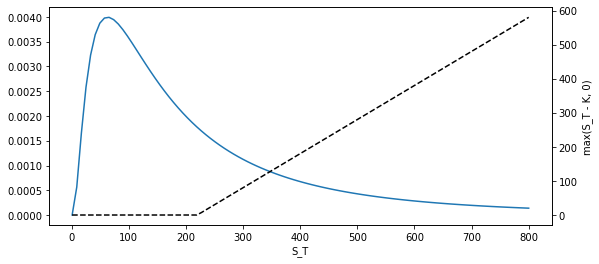

In [138]:
"""Straightforward integration vs Black Scholes
"""
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt

# See Chapter 2.4
def black_scholes(cpflag,S,K,T,r,sigma):
    # cpflag in {1 for call, -1 for put}
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    price = cpflag * (S * norm.cdf(cpflag*d1, 0.0, 1.0) - K * np.exp(-r * T) * 
            norm.cdf(cpflag*d2, 0.0, 1.0))
    return price

# probability density function P(S_T > K)
def PdF(S, S_0, rf, sd, t):
    A = 1 / ( np.sqrt(2*np.pi*t)*sd*S)
    B = np.exp(-(np.log(S)-(np.log(S_0)+(rf-0.5*sd**2)*t))**2/(2*sd**2*t))
    return A * B

# expected value S_T
def EdF(S, S_0, rf, sd, t):
    A = 1 / ( np.sqrt(2*np.pi*t)*sd*S)
    B = np.exp(-(np.log(S)-(np.log(S_0)+(rf-0.5*sd**2)*t))**2/(2*sd**2*t))
    return S * A * B

# expected value of (S_T - K)
def E2dF(S, S_0, rf, sd, t, K):
    A = 1 / ( np.sqrt(2*np.pi*t)*sd*S)
    B = np.exp(-(np.log(S)-(np.log(S_0)+(rf-0.5*sd**2)*t))**2/(2*sd**2*t))
    return (S - K) * A * B

# Inputs
S_0   = 220  # price of the underlying
K     = 220  # strike price
sigma = .98  # volatility
rate  = np.log(1.21)  # converting the ISDA rate
T     = 1    # time to maturity
steps = 2    # steps

# asset or nothin
AoN = quad(lambda x: EdF(x, S_0, rate, sigma, T), K, +np.inf)[0] * np.exp(-rate*T)
# cash or nothing with cash = K
CoN = K * quad(lambda x: PdF(x, S_0, rate, sigma, T), K, +np.inf)[0] * np.exp(-rate*T)
# straight forward integration
Call = quad(lambda x: E2dF(x, S_0, rate, sigma, T, K), K, +np.inf)[0] * np.exp(-rate*T)

print(f"Black-Scholes price        : {black_scholes(1,S_0,K,T,rate,sigma):.8f}")
print(f"AoN - CoN                  : {AoN-CoN:.8f}")
print(f"Straightforward integration: {Call:.8f}")

x = np.linspace(1, 800, 100)
fig, ax1 = plt.subplots(figsize=(9,4))
ax1.plot(x, PdF(x, S_0, rate, sigma, T))
ax1.set_xlabel('S_T')
ax2 = ax1.twinx()
ax2.plot(x, np.maximum(x-K,0), '--', color="black")
ax2.set_ylabel('max(S_T - K, 0)')
plt.show()

## Greeks

Greeks are partial derivatives that describe the sensitivity of the price of an option to a change in the respective underlying parameters.

![image.png](figures/greeks.png)

Greeks are not constant, see e.g. delta (red) and gamma (blue)

![image-3.png](figures/gamma_delta.png)

## Implied volatility

All parameters that determine the option price in a BSM model are observable, except $\sigma$. However, option prices are not calculated, they are the result of supply and demand on a liquid market. Thus, given an option price, we can find the $\sigma$ that ceteris paribus equates the BSM price with the market price.

In [139]:
"""Calculate implied volatility
"""
# Inputs
S_0   = 220  # price of the underlying
K     = 220  # strike price
rate  = np.log(1.21)  # converting the ISDA rate
T     = 1    # time to maturity
steps = 2    # steps
P_MKT = 85   # market price of the option

def iv_solve(IV):
    P_BSM = black_scholes(1,S_0,K,T,rate,IV)
    return (P_BSM - P_MKT)**2
IV = minimize(iv_solve, x0=0.25, bounds = ((0, None),)).x[0]

print(f'Implied vol: {IV:.4f}')
print(f'BSM price  : {black_scholes(1,S_0,K,T,rate,IV):.4f}')

Implied vol: 0.8251
BSM price  : 85.0000


Consider a matrix of option prices for different strikes and maturities. According to the theory, the resulting volatility surface should be flat, however, we usually observe sth like

![image.png](figures/volsurface.png)

Reasons for a non-flat volatility surface

* bid/ask spreads
* transaction cost
* continous hedge is not possible
* returns are not normally distributed (leptokurtosis)


<a id='CreditDerivatives'></a>
# Credit risk and credit derivatives

![image.png](figures/marketrisk_creditrisk.png)

## Credit default swaps (CDS)

A CDS contract works like an insurence that is linked to a credit event. This is, the protection buyer pays a premium $S$ (CDS spread) to the protection seller until the contract matures in $T$. In case of a default during the term of the contract, i.e. default in $\tau < T$, the protection buyer receives a settlement payment from the seller. This settlement payment is often, but not necessarily, designed to cover the loss given the default of a credit risky position, i.e. $(1 - \mathrm{Recovery})$.


Credit events (ISDA credit derivative definition 5/99 6/03 4/09 2/14):
* Bankruptcy
* Failure to Pay
* Restructuring (US until 4/09)
* Government Intervention, Bail-in
* Repudiation (only countries)


![image-2.png](figures/lehman_isda_settlement.png)

## Replication

![image-3.png](figures/cds_replication.png)

The payout can be replicarted with one credit risky and another risk free floater, which both trade at par. Shorting the risky floater yields 100% nominal, which can be invested into the risk free floater. The latter pays per definition the risk free rate $r_f$, wheres payments into the risky floater include an additional (credit) spread $r_f + S_{FRN = Par}$. In case of a credit event, the risk free floater is sold at 100%, whereas the risky floater is bought back at recovery. As this replicates the payout of the CDS $(1 - \mathrm{Recovery})$, the replicating credit spread must be equal to the CDS spread $S$. However, this is only an approximation, as it ignores that recovery is only paid on the nominal amount, transaction costs, and liquidity differences (availability) of the floaters.

$$S_{FRN = Par} \approx S$$

If a floater is not trading at par, the replication does not work. However, the PV difference must be due to the discounted difference in spreads. Thus, given the spread $S_{FRN \neq Par}$ and price $P_{FRN\neq Par}$ of a non par floater, we can solve for the spread of the corresponding par floater $S_{FRN = Par}$

$$
\begin{align}
P_{FRN\neq Par} - 100\% &= PV(S_{FRN\neq Par} - S_{FRN = Par})\\
    &= (S_{FRN\neq Par} - S_{FRN = Par}) \sum_{t=1}^T DF_t\\
    &...\\
S_{FRN = Par} &= S_{FRN\neq Par} - \frac{P_{FRN \neq Par} - 100\%}{\sum_{t=1}^T DF_t}
\end{align}
$$

In reality, costs arise from shorting the FRN, i.e. the bond has to be borrowd for a fee $S_{Repo}$. Thus

$$S_{FRN = Par} + S_{Repo} = S$$

No floater available? No problem, use an asset swap to create a synthetic floater, which at par is worth

$$
\begin{align}
100\% &= P_\mathrm{Bond} - PV(C_\mathrm{Bond}) + PV(\mathrm{Libor} + S)\\\\
    &= P_\mathrm{Bond} - C_\mathrm{Bond} \sum_{t=1}^T DF_t + 1 - DF_T + S \sum_{t=1}^T DF_t\\\\
S &= \frac{DF_T + C_\mathrm{Bond} \sum_{t=1}^T DF_t - P_\mathrm{Bond}}{\sum_{t=1}^T DF_t}
\end{align}
$$

If the bond is trading at par, $S$ is simply

$$S = C_\mathrm{Bond} - \frac{1-DF_T}{\sum_{t=1}^T DF_t}\\\\$$

The asset swap spread is only an approximation for the CDS spread, as the CDS cash flow is not perfectly replicated (close out value of the swap) and there might be liquidity issues.

## Valuation with hazard rates

As always, the price of a financial product is the sum of its discounted (expected) cash flows. Accounting for credit risk simply means accounting for both, (risk free) interest rate and the probability of default.

Let $h_t$, the hazard rate (default intensity), be the probability to default in an infinitesimally short time interval $dt$.

$$h_t = \ln\left(\frac{1-p_{t-1}}{1-p_t} \right) \implies e^{h_t} = \frac{1-p_{t-1}}{1-p_t} \Longleftrightarrow p_t = 1 - \frac{1- p_{t-1}}{e^{h_t}}$$

Then $a_t(h_t)$ is the present value of a paymment of $1$ at time $t$ if $t < \tau$, hence, no default. Think of this as a discount factor ($DF_t$) that also accounts for the likelyhood of the asset being alive.

$$a_t(h_t) = e^{-(h_t+r_t)t}$$

On the other hand, $b_t(h_t)$ is the present value of a payment of 1 at time $t$ if $t-1 < \tau < t$, hence, default between $t-1$ and $t$.

$$b_t(h_t) = e^{-r_t t} \left( e^{-(h_t)t_{-1}} - e^{-(h_t)t} \right)$$

Summing up the risky discount factors $a_t(h_t)$ and $b_t(h_t)$

$$
\begin{align}
A_T &= \sum_{t=1}^T a_t\\
B_T &= \sum_{t=1}^T b_t
\end{align}
$$

Allows us to price a CDS with spread $S$ as

$$
\begin{align}
0 &= PV(1-\mathrm{Recovery}) - PV(S)\\
  &= B_T(1-\mathrm{Recovery}) - A_T S\\\\
S &= \frac{B_T(1-\mathrm{Recovery})}{A_T}
\end{align}
$$

Hint: compare this to the single curve swap pricing above.

In practise, in preparation for central counterparty clearing, spread payments into a CDS are fixed at, i.e. $S^* \in \{0.002,0.01,0.05,0.1\}$, see ISDA agreements. Also the recovery rate is fixed, e.g. to 40% for investment grade. Therefore, contracts are unfair when entered and require an upfont payment

$$\mathrm{Upfront} =  B_T(1-\mathrm{Recovery}) - A_T S^*$$

In [140]:
"""Fair spread and upfront payment
"""
import numpy as np

def CDS_AB(h, r, T):
    # assuming a constant hazard rate h
    A_T = 0
    B_T = 0
    for t in range(1, T+1):
        r_t = r[t-1] if isinstance(r, (list, np.ndarray)) else r
        A_T += np.exp(-(h + r_t)*t)
        B_T += np.exp(-r_t*t) * ( np.exp(-h*(t-1)) - np.exp(-h*t) )

    return (A_T, B_T)

# Example:
h = 0.0209224
R = 0.3

# Fair spread:
A_T, B_T = CDS_AB(h, np.log([1.0365, 1.0386]), 2)
S = B_T*(1 - R) / A_T
print(f"Fair CDS spread: {S:.4f}")

# Upfront payment (spread payment of 100 basis points = 0.01)
upfront = (B_T*(1 - R) - A_T * 0.01) *10**7 
upfront_alt = (S - 0.01) * A_T *10**7

print(f"Upfront payment on 10mln nominal: {upfront:.4f}")
print(f"Upfront payment on 10mln nominal: {upfront_alt:.4f}")

Fair CDS spread: 0.0148
Upfront payment on 10mln nominal: 88025.0332
Upfront payment on 10mln nominal: 88025.0332


## Hazard rate calibration

Recall the CDS replication via floating rate notes, solve for $h$ in $A_T$ and $B_T$, using that $S_{FRN = Par} \approx S$

$$
\begin{align}
P_{FRN} - 100\% &= (S_{FRN} - S) A_T\\
    &= A_T S_{FRN} - B_T(1-\mathrm{Recovery})\\
\end{align}
$$

Note that

$$\frac{S}{1-\mathrm{Recovery}} = \frac{B_T}{A_T} \approx h$$

This approximation is often called "credit triangle".

In [141]:
"""Calibrate constant hazard rate to floater
"""
from scipy.optimize import minimize

r = 0.0917
T = 2
P_FRN = 1
S_FRN = 0.004
R = 0.2

def h_solve(h):
    A_T, B_T = CDS_AB(h, r, T)
    return (A_T*S_FRN - B_T*(1-R) + 1 - P_FRN)**2*100

# Find h that solves PV(alive) = PV(dead)
h = minimize(h_solve, x0=0.0001, bounds = ((0, None),)).x[0]

A_T, B_T = CDS_AB(h, r, T)
S = B_T*(1 - R) / A_T

print(f'Calibrated hazard rate: {h:.6f}')
print(f'Credit triangle       : {S_FRN/(1-R):.6f}')  # this works because P_FRN = 100% !
print(f'Calibrated CDS spread : {S:.6f}')
print(f'With A_T={A_T:.4f} and B_T={B_T:.6f}')

Calibrated hazard rate: 0.004988
Credit triangle       : 0.005000
Calibrated CDS spread : 0.004000
With A_T=1.7320 and B_T=0.008660


# Thank you for your attention

https://github.com/cafawo/derivatives/graphs/contributors

In [142]:
# This will convert the notebook to a html file
import os
# Convert to html slides
os.system('jupyter nbconvert derivatives.ipynb --to html')

0